In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-price-bangladesh/house_price_bd.csv


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [48]:
df= pd.read_csv("/kaggle/input/house-price-bangladesh/house_price_bd.csv")
df

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"
...,...,...,...,...,...,...,...,...,...
3860,"Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...",3.0,3.0,8,vacant,1350.0,gazipur,"৳4,500,000","Joydebpur, Gazipur Sadar Upazila"
3861,Properly Designed This 1000 Square Feet Apartm...,2.0,2.0,7,vacant,1000.0,gazipur,"৳4,300,000","Chandana, Gazipur Sadar Upazila"
3862,1240 Sq Ft Flat For Sale Is Awaiting You In Ga...,3.0,3.0,9,vacant,1240.0,gazipur,"৳4,960,000","Joydebpur, Gazipur Sadar Upazila"
3863,An Apartment Of 1300 Sq Ft Is Up For Sale In J...,3.0,3.0,9,vacant,1300.0,gazipur,"৳5,200,000","Joydebpur, Gazipur Sadar Upazila"


In [49]:
df.sample(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
3434,Residential Plot Is Available For Sale In Bpro...,NaN,NaN,NaN,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
2951,Grab This 2622 Sq Ft Apartment Available To Sa...,4.0,5.0,9,vacant,2622.0,chattogram,"৳30,153,000","Nasirabad, 15 No. Bagmoniram Ward"
3837,This Very New Nice Flat Of 920 Sq Ft Is Up For...,3.0,2.0,8,vacant,920.0,gazipur,"৳3,220,000","Chandana, Gazipur Sadar Upazila"
578,Close To Khilkhet Bazar Masjid A 951 Sq.ft Fla...,2.0,2.0,2,vacant,951.0,dhaka,"৳2,472,600","Bazar Road, Dumni"
94,Modern 1150 Sq Ft Flat For Sale In Badda,3.0,3.0,3,vacant,1150.0,dhaka,"৳8,800,000","Middle Badda, Badda"
3276,A Plot Which Is Up For Sale In Bproperty Villa...,NaN,NaN,NaN,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
362,Lovely Apartment Of 1200 Sq Ft Is Up For Sale ...,3.0,3.0,4,vacant,1200.0,dhaka,"৳8,700,000","Section 1, Mirpur"
3157,Your Desired Large 1445 Sq Ft Home In Mogbari ...,3.0,3.0,8,vacant,1445.0,cumilla,"৳5,780,000","Mogbari Choumohoni, Chotora"
3668,"5 Katha Plot for sale in Bproperty Village, Na...",NaN,NaN,NaN,vacant,3600.0,narayanganj-city,"৳7,625,000","Rupganj, Narayanganj"
2448,An Apartment Of 1610 Sq.ft Is Up To Sale In Na...,3.0,4.0,2,vacant,1610.0,chattogram,"৳10,500,000","Nasirabad Housing Society, Muradpur"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [51]:
df. isnull().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [52]:
df.groupby('Location')['Location'].count()

Location
1 No Railway Gate, Muradpur                       5
1 No. Goli, 29 No. West Madarbari Ward            3
10 No. North Kattali Ward                         4
12 No. Sarai Para Ward, Double Mooring           45
14 No. Lalkhan Bazaar Ward, Lal Khan Bazaar      14
                                                 ..
Yakub Nagar Road, 33 No. Firingee Bazaar Ward    10
Zakir Hosain Road, Mohammadpur                    1
Zakir Hossain By Lane, East Nasirabad             4
Zakir Hossain Road, Khulshi                      13
aziz Moholla, Mohammadpur                         1
Name: Location, Length: 505, dtype: int64

In [53]:
df.groupby('City')['City'].count()

City
chattogram          1470
cumilla              145
dhaka               1650
gazipur              180
narayanganj-city     420
Name: City, dtype: int64

In [54]:
df1=df.drop(['Title','Occupancy_status','Location'],axis=1)

In [55]:
df1

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3,1960.0,dhaka,"৳39,000,000"
1,3.0,3.0,1,1705.0,dhaka,"৳16,900,000"
2,3.0,3.0,6,1370.0,dhaka,"৳12,500,000"
3,3.0,3.0,4,2125.0,dhaka,"৳20,000,000"
4,3.0,3.0,4,2687.0,dhaka,"৳47,500,000"
...,...,...,...,...,...,...
3860,3.0,3.0,8,1350.0,gazipur,"৳4,500,000"
3861,2.0,2.0,7,1000.0,gazipur,"৳4,300,000"
3862,3.0,3.0,9,1240.0,gazipur,"৳4,960,000"
3863,3.0,3.0,9,1300.0,gazipur,"৳5,200,000"


In [56]:
df1.isnull().sum()

Bedrooms         1001
Bathrooms        1001
Floor_no          684
Floor_area         99
City                0
Price_in_taka       0
dtype: int64

In [57]:
df1['Bedrooms'].unique()

array([ 3.,  4.,  2., nan, 16.,  8.,  5.,  1.,  6., 18., 46.,  7., 13.,
       33., 50., 23., 21., 22., 20., 27., 15.])

In [58]:
df1['Bedrooms'].value_counts().sort_index()

Bedrooms
1.0        3
2.0      406
3.0     2191
4.0      220
5.0        5
6.0        3
7.0        8
8.0        4
13.0       1
15.0       1
16.0       5
18.0       3
20.0       1
21.0       3
22.0       2
23.0       2
27.0       1
33.0       2
46.0       1
50.0       2
Name: count, dtype: int64

In [59]:
df1[df1['Bedrooms'] == 50.0]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
1717,50.0,10.0,NaN,24500.0,chattogram,"৳70,000,000"
1949,50.0,10.0,NaN,24500.0,chattogram,"৳70,000,000"


In [60]:
df1[df1['Bedrooms'] == 21.0]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
2100,21.0,10.0,0+7,13300.0,chattogram,"৳105,000,000"
2132,21.0,10.0,1,24000.0,chattogram,"৳60,000,000"
2202,21.0,10.0,1,24000.0,chattogram,"৳60,000,000"


/tmp/ipykernel_35/2846096452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedrooms'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bedrooms', ylabel='Density'>

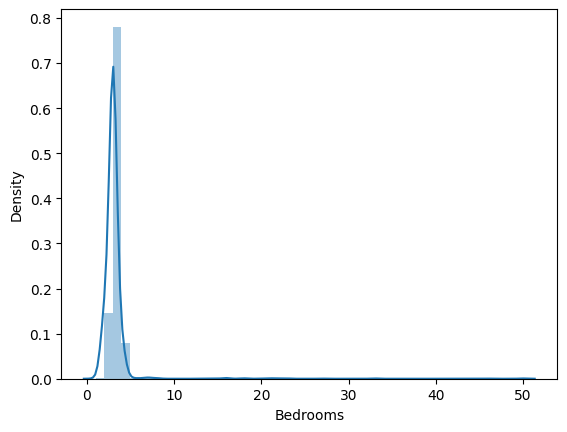

In [16]:
import seaborn as sns
sns.distplot(df['Bedrooms'])

/tmp/ipykernel_35/3286393789.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathrooms'])
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bathrooms', ylabel='Density'>

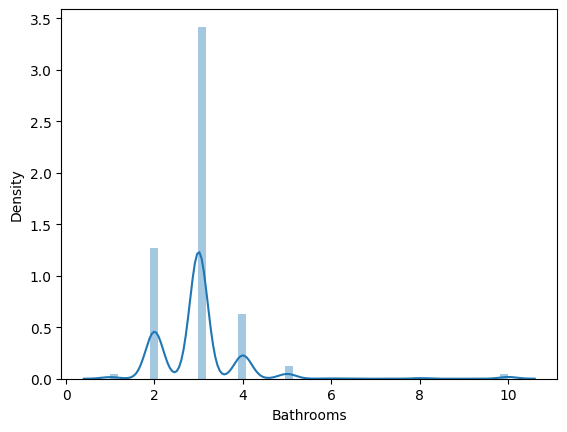

In [17]:
sns.distplot(df['Bathrooms'])

In [61]:
df1['Bathrooms'].unique()

array([ 4.,  3.,  2., nan,  5., 10.,  1.,  6.,  8.])

In [62]:
df1['Bathrooms'].value_counts().sort_index()

Bathrooms
1.0       22
2.0      653
3.0     1763
4.0      324
5.0       66
6.0        4
8.0        8
10.0      24
Name: count, dtype: int64

In [63]:
df1['Floor_area'].unique()

array([1.9600e+03, 1.7050e+03, 1.3700e+03, 2.1250e+03, 2.6870e+03,
       1.1500e+03, 2.1190e+03, 2.3180e+03, 1.3970e+03, 2.4000e+03,
       1.3000e+03, 1.9000e+03, 1.5000e+03, 1.4500e+03, 7.5000e+02,
       2.3430e+03, 1.1850e+03, 1.6100e+03, 2.1800e+03, 3.6500e+03,
       5.0000e+03, 2.7000e+03, 1.1750e+03, 6.5000e+02, 1.3310e+03,
       9.0000e+02, 1.3500e+03, 1.2000e+03, 2.0450e+03, 1.4100e+03,
       1.1000e+03, 1.2200e+03, 1.2400e+03, 1.7000e+03, 1.4000e+03,
       1.0500e+03, 1.6000e+04, 1.5040e+03, 1.9800e+03, 1.5850e+03,
       1.4850e+03, 1.5450e+03, 5.6000e+03, 1.3400e+03, 1.2750e+03,
       1.2450e+03, 8.5000e+02, 1.4400e+03, 9.4800e+02, 2.6440e+03,
       8.0000e+02, 2.0000e+03, 1.5930e+03, 1.0400e+03, 1.6200e+03,
       1.5500e+03, 1.0000e+03, 1.8400e+03, 7.4000e+02, 1.2500e+03,
       1.4300e+03, 1.6900e+03, 1.3300e+03, 1.2300e+03, 1.2650e+03,
       1.5540e+03, 1.5700e+03, 8.1500e+02, 2.5530e+03, 1.5900e+03,
       9.5000e+02, 8.6000e+02, 3.3550e+03, 1.3750e+03, 2.1500e

In [64]:
df1['Floor_no'].unique()

array(['3', '1', '6', '4', '8', '2', '5', '7', '9', '8th', nan, '10',
       '14', 'G+7', '13', '12', '1st', '11', 'A1,A2,A3,A4,A5,A6,A7',
       '0+7', '1F', '4th to 8th Backside', '18', '5th', '17',
       'Merin City - Purbach'], dtype=object)

# File Handling

**Convert Floor_no to a clean numeric column so it can be used in regression models.**

In [65]:
def convert_floor(floor):
    floor= str(floor).lower().strip()

     #Handale simple number like "14" , "13"
    if floor.isdigit():
        return int(floor)

    #Handle ordinal number like '1st' , '5th'
    if 'st' in floor or 'nd' in floor or 'rd' in floor or 'th' in  floor:
        try:
            return int(''.join(filter(str.isdigit,floor)))
        except:
            return np.nan

    ## Handle 'G+7', '0+7', etc.
    if '+' in floor:
        parts= floor.split('+')
        try:
            nums= [int(''.join(filter(str.isdigit, f))) for f in floor.split('to')]
            return sum(nums) // len(nums) #Take average floor
        except:
            return np.nan
     # If it contains comma-separated codes like 'A1,A2,A3'
    if ',' in floor:
        return np.nan #invalid format

    return np.nan #for all other unknown formats

# Apply conversion
df1['Floor_no'] = df1['Floor_no'].apply(convert_floor)

In [66]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,"৳39,000,000"
1,3.0,3.0,1.0,1705.0,dhaka,"৳16,900,000"
2,3.0,3.0,6.0,1370.0,dhaka,"৳12,500,000"
3,3.0,3.0,4.0,2125.0,dhaka,"৳20,000,000"
4,3.0,3.0,4.0,2687.0,dhaka,"৳47,500,000"


In [67]:
df1['Price_in_taka'].sample(10)

1003    ৳11,000,000
2666    ৳17,500,000
1596    ৳11,700,000
3731     ৳5,200,000
2213     ৳6,000,000
63      ৳21,500,000
3591     ৳4,575,000
1061     ৳9,000,000
3846     ৳4,400,000
1162     ৳6,000,000
Name: Price_in_taka, dtype: object

**To convert the Price_in_taka column into a numeric format (integer or float)**

In [68]:
df1['Price_in_taka'] = df1['Price_in_taka'].replace({'৳': '', ',': ''}, regex= True) .astype(int)

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2864 non-null   float64
 1   Bathrooms      2864 non-null   float64
 2   Floor_no       3173 non-null   float64
 3   Floor_area     3766 non-null   float64
 4   City           3865 non-null   object 
 5   Price_in_taka  3865 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 181.3+ KB


In [70]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,39000000
1,3.0,3.0,1.0,1705.0,dhaka,16900000
2,3.0,3.0,6.0,1370.0,dhaka,12500000
3,3.0,3.0,4.0,2125.0,dhaka,20000000
4,3.0,3.0,4.0,2687.0,dhaka,47500000


# Outliears

**Filtering out flats that have very small bedrooms — possibly overcrowded or poorly designed**

In [71]:
df1[df1.Floor_area/df1.Bedrooms < 300]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
139,8.0,4.0,NaN,2146.0,dhaka,10500000
319,8.0,4.0,NaN,2146.0,dhaka,10500000
473,3.0,2.0,5.0,875.0,dhaka,5700000
492,3.0,2.0,6.0,750.0,dhaka,5200000
524,3.0,2.0,4.0,820.0,dhaka,6000000
542,3.0,3.0,1.0,850.0,dhaka,7000000
551,3.0,2.0,4.0,879.0,dhaka,5274000
772,3.0,2.0,1.0,820.0,dhaka,3700000
803,1.0,1.0,3.0,250.0,dhaka,3400000
828,4.0,3.0,7.0,1160.0,dhaka,4408000


In [72]:
df1.shape

(3865, 6)

In [73]:
df2=df1[~(df1.Floor_area/df1.Bedrooms < 300)]
df2.shape

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


(3843, 6)

In [74]:
df2.Price_in_taka.describe()

count    3.843000e+03
mean     1.260506e+07
std      2.918947e+07
min      6.600000e+01
25%      4.945000e+06
50%      7.000000e+06
75%      1.100000e+07
max      5.320000e+08
Name: Price_in_taka, dtype: float64

/tmp/ipykernel_35/2319876372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Price_in_taka, bins=100)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_in_taka', ylabel='Density'>

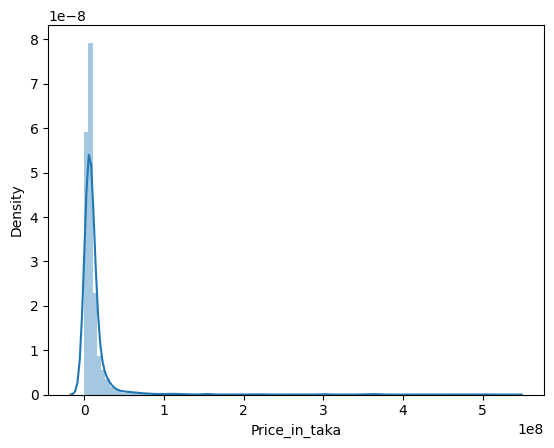

In [76]:
sns.distplot(df2.Price_in_taka, bins=100)

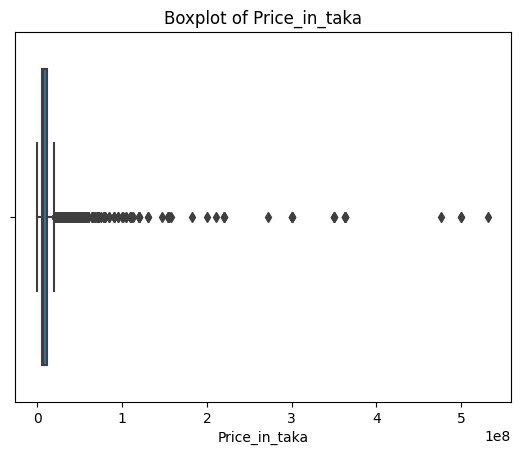

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df2['Price_in_taka'])
plt.title('Boxplot of Price_in_taka')
plt.show()


In [105]:
Q1 = df2['Price_in_taka'].quantile(0.25)
Q3 = df2['Price_in_taka'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
df3 = df2[(df2['Price_in_taka'] >= lower_bound) & (df2['Price_in_taka'] <= upper_bound)]


In [106]:
df3.shape

(3458, 6)

In [107]:
df3[df3.Price_in_taka<1500000]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
1727,NaN,NaN,1.0,86.0,chattogram,1050000
1891,NaN,NaN,2.0,200.0,chattogram,1300000
1892,NaN,NaN,2.0,200.0,chattogram,1300000
1959,NaN,NaN,1.0,86.0,chattogram,1050000
2009,NaN,NaN,NaN,NaN,chattogram,54235
2010,NaN,NaN,NaN,NaN,chattogram,6669
2048,NaN,NaN,NaN,NaN,chattogram,66
2178,NaN,NaN,1.0,84.0,chattogram,1250000
2599,NaN,NaN,1.0,95.0,chattogram,1240000
2600,NaN,NaN,1.0,90.0,chattogram,1260000


In [108]:
df3 = df3[df3['Price_in_taka'] >= 1500000]


In [109]:
df3.shape

(3442, 6)

In [111]:
df3.Price_in_taka.describe()

count    3.442000e+03
mean     7.475247e+06
std      3.742465e+06
min      1.500000e+06
25%      4.672500e+06
50%      6.500000e+06
75%      9.000000e+06
max      2.000000e+07
Name: Price_in_taka, dtype: float64

/tmp/ipykernel_35/1446721712.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.Price_in_taka)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price_in_taka', ylabel='Density'>

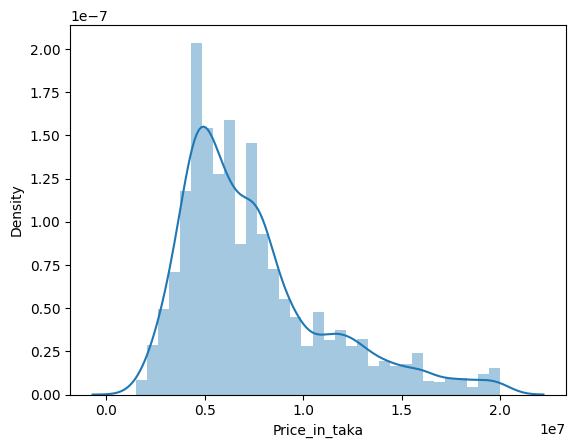

In [127]:
sns.distplot(df3.Price_in_taka)

In [128]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,39000000
1,3.0,3.0,1.0,1705.0,dhaka,16900000
2,3.0,3.0,6.0,1370.0,dhaka,12500000
3,3.0,3.0,4.0,2125.0,dhaka,20000000
4,3.0,3.0,4.0,2687.0,dhaka,47500000


In [129]:
df3.Floor_area.describe()

count     3373.000000
mean      1469.730803
std       1127.426282
min         89.000000
25%       1080.000000
50%       1337.000000
75%       1646.000000
max      43200.000000
Name: Floor_area, dtype: float64

/tmp/ipykernel_35/3457127852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Floor_area)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Floor_area', ylabel='Density'>

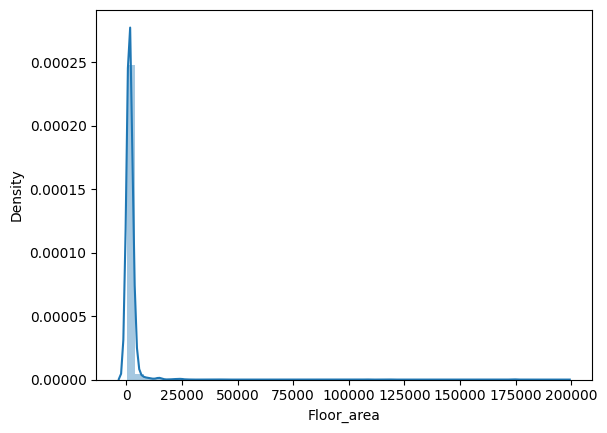

In [130]:
sns.distplot(df.Floor_area)

**Remove Floor Area Outliers Using IQR**

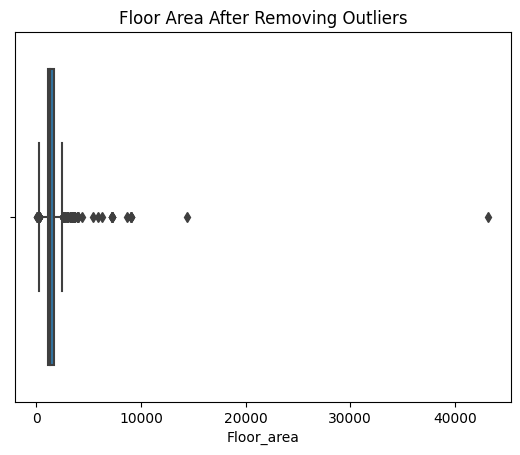

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df3['Floor_area'])
plt.title("Floor Area After Removing Outliers")
plt.show()


In [132]:
Q1 = df3['Floor_area'].quantile(0.25)
Q3 = df3['Floor_area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df3 = df3[(df3['Floor_area'] >= lower_bound) & (df3['Floor_area'] <= upper_bound)]


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


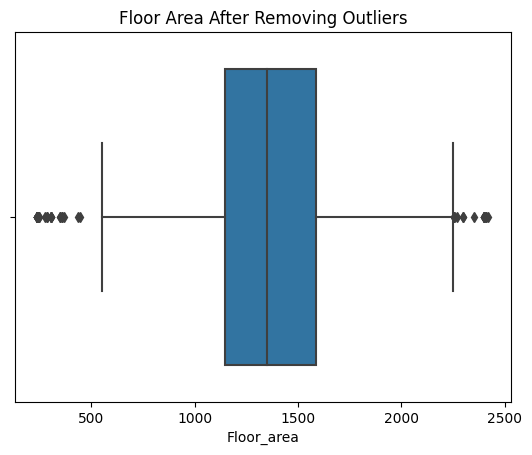

In [133]:
sns.boxplot(x=df3['Floor_area'])
plt.title("Floor Area After Removing Outliers")
plt.show()


In [134]:
df3.Floor_area.describe()

count    2883.000000
mean     1386.994797
std       396.119520
min       240.000000
25%      1145.000000
50%      1350.000000
75%      1587.000000
max      2420.000000
Name: Floor_area, dtype: float64

In [136]:
df3.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2596.000000,2596.000000,2630.000000,2883.000000,2.883000e+03
mean,2.880971,2.835901,4.615589,1386.994797,7.667188e+06
std,0.431969,0.602530,2.895831,396.119520,3.663966e+06
min,1.000000,1.000000,1.000000,240.000000,1.500000e+06
25%,3.000000,2.000000,2.000000,1145.000000,4.955000e+06
50%,3.000000,3.000000,4.000000,1350.000000,6.600000e+06
75%,3.000000,3.000000,6.000000,1587.000000,9.335000e+06
max,6.000000,6.000000,48.000000,2420.000000,2.000000e+07


In [138]:
df3.sample(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
3836,3.0,3.0,6.0,1028.0,gazipur,3906400
1712,3.0,3.0,4.0,1320.0,chattogram,5940000
815,2.0,2.0,4.0,650.0,dhaka,3500000
3481,NaN,NaN,NaN,2160.0,narayanganj-city,4575000
1285,3.0,3.0,6.0,1050.0,dhaka,8200000
1276,3.0,4.0,2.0,1650.0,dhaka,14000000
2824,2.0,2.0,2.0,969.0,chattogram,3600000
2768,3.0,3.0,1.0,1465.0,chattogram,9962000
992,3.0,3.0,7.0,1310.0,dhaka,9200000
1771,3.0,3.0,5.0,1685.0,chattogram,9267500
